# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Returning size of random selection back to original for hw submission
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

39
['constitucion', 'sinnamary', 'ushuaia', 'rikitea', 'kodiak', 'new norfolk', 'hermanus', 'georgetown', 'atuona', 'shellbrook', 'isabela', 'busselton', 'malm', 'boffa', 'punta arenas', 'edson', 'ponta do sol', 'zhigansk', 'kapaa', 'marechal deodoro', 'luderitz', 'fairbanks', 'yellowknife', 'dingle', 'nishihara', 'avarua', 'albany', 'margate', 'omboue', 'taolanaro', 'aksu', 'biloela', 'upernavik', 'tabiauea', 'dikson', 'quelimane', 'saldanha', 'hilo', 'codrington']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create the base url and query url that will be used for the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Defult is kelvin, so I need to update units to read fahrenheit
units = "imperial"
query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units

In [5]:
# Perform a GET request
response = requests.get(query_url)

# Convert the response to a JSON
weather_data = response.json()

# To print in a more readable way, use json.dumps with indent and sort_keys
print(json.dumps(weather_data, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
        "lat": -38.2667,
        "lon": 141.9667
    },
    "dt": 1613152668,
    "id": 2171099,
    "main": {
        "feels_like": 55.2,
        "grnd_level": 1009,
        "humidity": 84,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 58.15,
        "temp_max": 58.15,
        "temp_min": 58.15
    },
    "name": "Codrington",
    "sys": {
        "country": "AU",
        "sunrise": 1613159918,
        "sunset": 1613208857
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 264,
        "speed": 7.09
    }
}


In [10]:
# Print the city number and name while it is being processed
# I've found that sometimes there is no city ID listed so I added this try logic to ensure the cell runs regardless
try:
    city_num = weather_data["sys"]["id"]
except(KeyError, IndexError):
    city_num = "NA"
city_name = weather_data["name"]
print(f"Currently processing {city_name}, ID Number:{city_num}")

Currently processing Codrington, ID Number:NA


In [11]:
# Putting everything together into a for loop now to get API request to run the list of cities

# Generate lists that will store the cities data as the loop runs
# Lists developed based on what information the homework requests we gather
city_name_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []

# Printing the log of cities as they are being requested per homework instructions
print(f"Requesting weather information from {len(cities)} random cities around the world")
print("-----------------------------")


# Set up loop to make an api call on each city in the list and store it's value before moving to the next
for city in cities:    
    
    # Need try logic for cases where weather api does not have records for that city
    try:
        # Update the query url with a new city
        query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
        # Perform a GET request
        response = requests.get(query_url)
        # Convert the response to a JSON
        weather_data = response.json()
        # print(json.dumps(weather_data, indent = 4, sort_keys = True))
   
        # Collect all weather information for that city
        city_num = weather_data["sys"]["id"]
        city_name_list.append(weather_data["name"])
        cloud_list.append(weather_data["clouds"]["all"])
        country_list.append(weather_data["sys"]["country"])
        date_list.append(weather_data["dt"])
        humidity_list.append(weather_data["main"]["humidity"])
        lat_list.append(weather_data["coord"]["lat"])
        lng_list.append(weather_data["coord"]["lon"])
        temp_list.append(weather_data['main']['temp'])
        wind_list.append(weather_data["wind"]["speed"])
    
        # Print that the city is currently being processed per homework instructions
        print(f"Currently processing {city}, ID Number:{city_num}")
    
    # If city data is not found then use this except command and continue to the next city
    except(KeyError, IndexError):
        print(f"Unfortunately unable to pull data for {city}, Skipping {city} for now")

    # Adding in a one second sleep interval between queries to avoid exceeding the API query limits
    time.sleep(1)
        
print("-----------------------------")
print(f"Finished collecting weather information from {len(cities)} cities around the world")
    

Requesting weather information from 39 random cities around the world
-----------------------------
Unfortunately unable to pull data for constitucion, Skipping constitucion for now
Unfortunately unable to pull data for sinnamary, Skipping sinnamary for now
Currently processing ushuaia, ID Number:8303
Unfortunately unable to pull data for rikitea, Skipping rikitea for now
Currently processing kodiak, ID Number:7668
Currently processing new norfolk, ID Number:2031307
Currently processing hermanus, ID Number:2006131
Currently processing georgetown, ID Number:9429
Unfortunately unable to pull data for atuona, Skipping atuona for now
Currently processing shellbrook, ID Number:875
Unfortunately unable to pull data for isabela, Skipping isabela for now
Currently processing busselton, ID Number:2020551
Currently processing malm, ID Number:1644
Unfortunately unable to pull data for boffa, Skipping boffa for now
Currently processing punta arenas, ID Number:8487
Currently processing edson, ID Nu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Use pandas function pd.DataFrame to create a dataframe from the list information generated above
# I chose to re-arrange this order of the columns here to what I felt more logical
cities_weather_df = pd.DataFrame({"City": city_name_list,
                                  "Country": country_list,
                                  "Temperature (F)": temp_list,
                                  "Date": date_list,
                                  "Humidity %": humidity_list,
                                  "Cloud": cloud_list,
                                  "Wind Speed": wind_list,
                                  "Lat": lat_list,
                                  "Lng":lng_list                                  
                                })

# Display the dataframe
cities_weather_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Ushuaia,AR,59.00,1613152283,44,40,26.46,-54.8000,-68.3000
1,Saint Paul Harbor,US,33.80,1613152498,80,90,20.71,57.7900,-152.4072
2,New Norfolk,AU,55.29,1613152543,75,61,3.00,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613152494,79,14,1.99,-34.4187,19.2345
4,George Town,MY,79.27,1613152395,89,20,2.30,5.4112,100.3354


In [13]:
# Save city data into a csv file
cities_weather_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Running this cell anyway just to be sure
cleaned_data_df = cities_weather_df[cities_weather_df["Humidity %"] < 100]
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Ushuaia,AR,59.00,1613152283,44,40,26.46,-54.8000,-68.3000
1,Saint Paul Harbor,US,33.80,1613152498,80,90,20.71,57.7900,-152.4072
2,New Norfolk,AU,55.29,1613152543,75,61,3.00,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613152494,79,14,1.99,-34.4187,19.2345
4,George Town,MY,79.27,1613152395,89,20,2.30,5.4112,100.3354


In [15]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = cities_weather_df[cities_weather_df["Humidity %"] > 100]

high_humidity_df

high_humidity_index = high_humidity_df.index
high_humidity_index

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# The step above created this cleaned dataframe, here it is displayed again
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Ushuaia,AR,59.00,1613152283,44,40,26.46,-54.8000,-68.3000
1,Saint Paul Harbor,US,33.80,1613152498,80,90,20.71,57.7900,-152.4072
2,New Norfolk,AU,55.29,1613152543,75,61,3.00,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613152494,79,14,1.99,-34.4187,19.2345
4,George Town,MY,79.27,1613152395,89,20,2.30,5.4112,100.3354


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

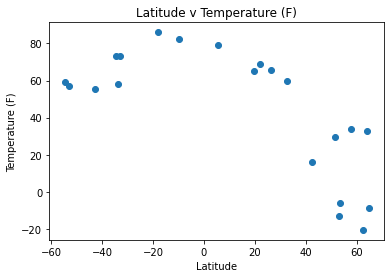

In [32]:
# Create Latitude vs. Temperature scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Temperature (F)"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Temperature (F).png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded.
The data seems to suggest that that the temperature seems to increase as it gets closer to 0 and decrease at varrying rates the further it gets from 0. This relationship supports the initial hypothesis that it gets warmer the closer you are to the equator.

## Latitude vs. Humidity Plot

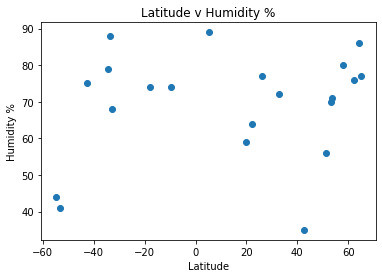

In [33]:
# Create Latitude vs. Humidity scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Humidity %"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Humidity %.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded.
The data does not show a true correlation between the latitude and the percent humidity. While we do see the humidity values to trend lower at more extreme latitudes (-50, 50) the data is too dispersed in this chart to accurately say there is a strong correlation between the two

## Latitude vs. Cloudiness Plot

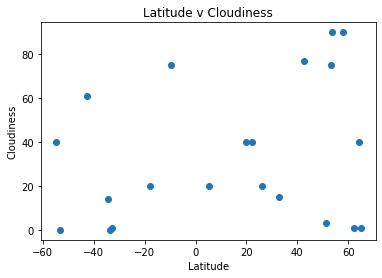

In [34]:
# Create Latitude vs. Cloudiness scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Cloud"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Cloudiness.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the Cloudiness value recorded.
The data seems to suggest that that there is little to no discernable coorilation between the level of cloudiness and the latitude, as the points are dispersed across the chart

## Latitude vs. Wind Speed Plot

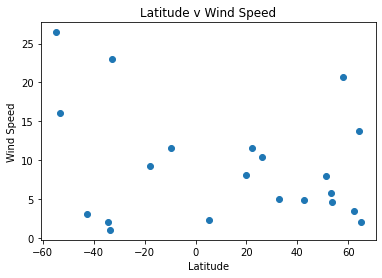

In [42]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Wind Speed"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Wind Speed.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded.
This chart again depicts little correlation between latitude and wind speed as the data is spread across the whole chart, not being effected by the latitude value it is tied to.

## Linear Regression

In [21]:
# Create Northern and Southern hemisphere dataframes based on homework instructions
# Norther hemisphere is if lat >= 0 and Southern is if it is < 0
northern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] >= 0]
southern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] < 0]
northern_hemisphere.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
1,Saint Paul Harbor,US,33.80,1613152498,80,90,20.71,57.7900,-152.4072
4,George Town,MY,79.27,1613152395,89,20,2.30,5.4112,100.3354
5,Shellbrook,CA,-13.00,1613152934,70,75,5.75,53.2168,-106.4011
7,Malm,NO,32.92,1613152937,86,40,13.80,64.0721,11.2172
9,Edson,CA,-5.80,1613152862,71,90,4.61,53.5835,-116.4356


In [22]:
# Generate x and y values to start
# These will be updated for each chart, but the rest of the setup will stay
x_values = cleaned_data_df["Lat"]
y_values = cleaned_data_df["Temperature (F)"]

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create a line equation using the linregress values generated above
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0     82.710648
1     20.488612
2     76.069320
3     71.447072
4     49.435371
5     23.015958
6     71.022256
7     17.016856
8     81.798787
9     22.813304
10    34.372819
11    40.226134
12    57.792157
13    16.593698
14    17.909982
15    37.955325
17    28.883199
18    24.030333
19    62.306308
20    70.669504
21    41.522357
Name: Lat, dtype: float64
y = -0.55x + 52.43


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7086511113199017


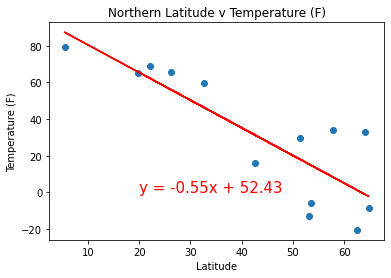

In [31]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature (F)"]

# Generate the scatter plot
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(20,0), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line clearly shows the hypothesis to be true as the temperature drops the further the latitude is from 0 (the equator). Also, the r value being pretty close to 1.0 each time I've run this with new random cities gives me confidence that the correlation between these values is strong.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7349756942050913


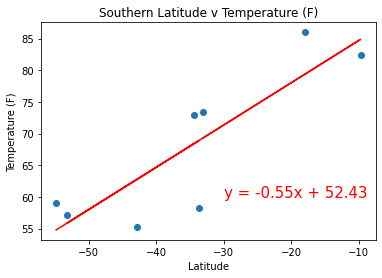

In [35]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature (F)"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-30,60), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line again clearly shows the hypothesis to be true as the temperature rises the closer the latitude gets to 0 (the equator). Also, the r value again is on the 'higher' side as it closer to 1.0, shows that the correlation between these values is strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.003279318813389648


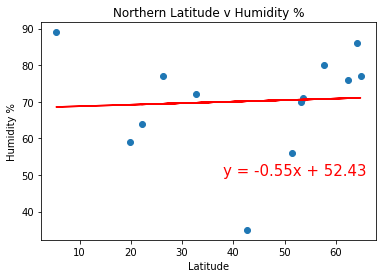

In [36]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(38, 50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
The regression leads me to believe that there is very little correlation between the latitude and the percent humidity. A low r value is a telling sign of this.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4288989767352471


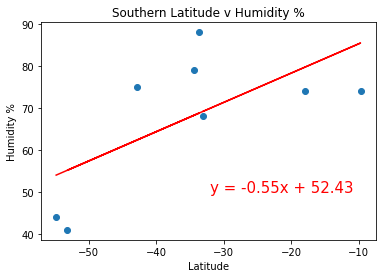

In [37]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
While there is a stronger correlation between the latitude and humidity in the southern hemisphere data gathered, the low r value and slope of the regression line indicate that this is still a weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.017414915284872864


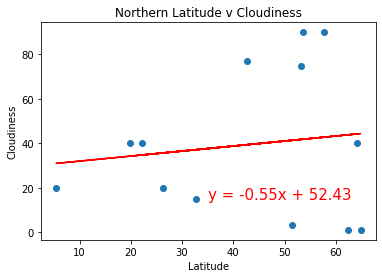

In [38]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,15), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the cloudiness value recorded. It also shows a regression line to further display any correlation.
There is a positive correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09085834567331783


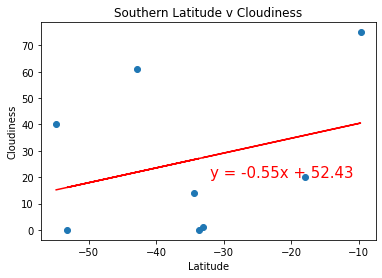

In [39]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
There is a negative correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017073651337997434


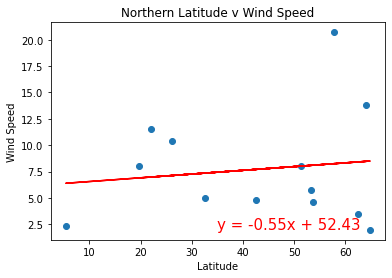

In [40]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,2), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the northern hemisphere there is a weak, yet slightly positive correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10830464622749003


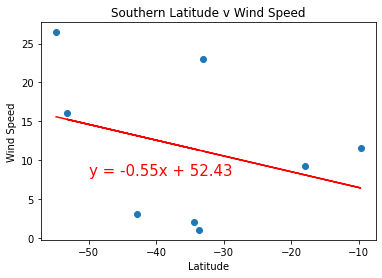

In [41]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-50, 8), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the southern hemisphere there is a weak, yet slightly negative correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.